In [1]:
#Importar bibliotecas
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Cargar los datos

wine = load_wine()


In [3]:
#Convertir a pandas dataframe
data=pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])

In [4]:
#Revisar los valores
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [5]:
x= wine.data
y= wine.target
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [6]:
#Modelos

models= {
    'Regresión Logística': LogisticRegression(max_iter=10000),
    'Máquinas de soporte vectorial': SVC(),
    'Arbol de decisión': DecisionTreeClassifier()
}

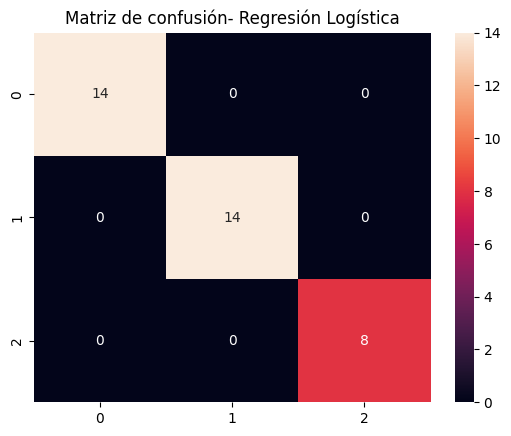

Modelo: Regresión Logística
Precisión: 1.0
Precisión: 1.0
Recall: 1.0
F1-score 1.0
Validación cruzada (5-folds):0.961111111111111
-------------------------------



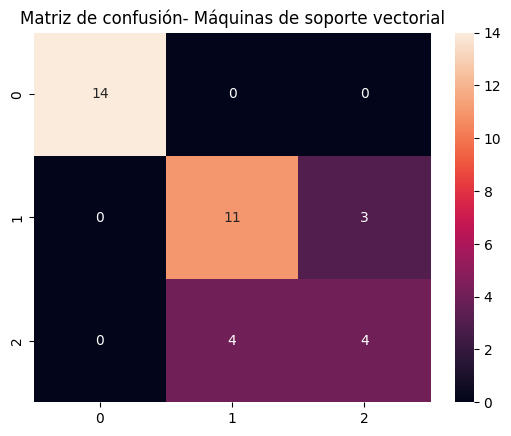

Modelo: Máquinas de soporte vectorial
Precisión: 0.8055555555555556
Precisión: 0.7682539682539682
Recall: 0.7619047619047619
F1-score 0.7639846743295019
Validación cruzada (5-folds):0.6634920634920635
-------------------------------



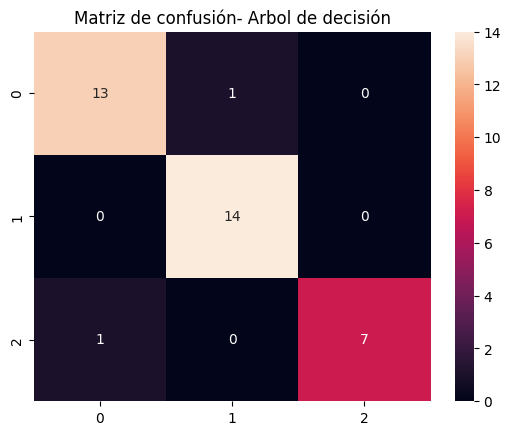

Modelo: Arbol de decisión
Precisión: 0.9444444444444444
Precisión: 0.953968253968254
Recall: 0.9345238095238096
F1-score 0.9424740010946907
Validación cruzada (5-folds):0.882063492063492
-------------------------------



In [7]:
#Evaluacion de modelos
for name, model in models.items():
  #Entrenamiento
  model.fit(x_train, y_train)

  #Predicción
  y_pred= model.predict(x_test)

  #Métricas de rendimiento
  accuracy= accuracy_score(y_test, y_pred)
  precision= precision_score(y_test, y_pred, average='macro')
  recall= recall_score(y_test, y_pred, average='macro')
  f1= f1_score(y_test, y_pred, average='macro')

  #Validación cruzada
  cross_val= cross_val_score(model, x, y, cv=5)

  #Matriz de confusión
  conf_matrix= confusion_matrix(y_test, y_pred)
  sns.heatmap(conf_matrix, annot=True)
  plt.title(f'Matriz de confusión- {name}')
  plt.show()

  print(f'Modelo: {name}')
  print(f'Precisión: {accuracy}')
  print(f'Precisión: {precision}')
  print(f'Recall: {recall}' )
  print(f'F1-score {f1}')
  print(f'Validación cruzada (5-folds):{cross_val.mean()}')
  print('-------------------------------\n')